# Online Retail - Behavioral Segmentation

In [1]:
import os 
os.chdir(r"E:\Data Container")

In [2]:
# basic 
import pandas as pd
import numpy as np 

In [3]:
# Viz 
import matplotlib.pyplot as plt 
import seaborn as sns 

### 1. Data Loading 

In [4]:
dataset = pd.read_csv("Online Retail.csv", encoding = "unicode_escape")

### 2. Data Inspection 

In [5]:
dataset.shape

(541909, 8)

In [6]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
dataset.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### 2.1 Type Casting 

In [9]:
# set to datetime 
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])

#### 2.2 Checking Null values 

In [10]:
totalNullData = pd.DataFrame(dataset.isna().sum()).T.rename({0:"Total null values"})
totalNullData

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Total null values,0,0,1454,0,0,0,135080,0


In [11]:
# Handling null values 

# Drop rows with null costomerID 

# CustomerID is very important one for customer segmatation. But the rows have null values so cannot be 
# compare to any customer so i remove the null rWindowsError

# Handling the description 
# The description is important one but this custeomer segmatation project not needed so i remove the null rows 

In [12]:
dataSetCleaned = dataset.dropna(subset = ['CustomerID'])

In [13]:
# Type casting 
dataSetCleaned['CustomerID'] = dataSetCleaned['CustomerID'].astype(str)

C:\Users\User\AppData\Local\Temp\ipykernel_21468\2311560116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSetCleaned['CustomerID'] = dataSetCleaned['CustomerID'].astype(str)


#### 3 Descriptive Statistics

In [14]:
# checking the negative values 

dataSetCleaned.describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


<h4>3.1  Negative values Handling</h4>

In [20]:
# Remove the lessthan zero 

dataSetCleaned = dataSetCleaned[dataSetCleaned['Quantity'] > 0]
dataSetCleaned = dataSetCleaned[dataSetCleaned['UnitPrice'] > 0]

In [22]:
# After cleaning the dataset 

dataSetCleaned.shape

(397884, 8)

In [23]:
# summary statistics 

dataSetCleaned.describe()

,Quantity,UnitPrice
count,397884.000000,397884.000000
mean,12.988238,3.116488
std,179.331775,22.097877
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


<h4>4 Exploratory Data Analysis</h4>

In [25]:
# Generate the Revenue column using the Quantity and unit price 

dataSetCleaned['Revenue'] = dataSetCleaned['Quantity'] * dataSetCleaned['UnitPrice']
dataSetCleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


<div>4.1 Top Countries by Transaction</div>

In [44]:
TopCountryTrx = dataSetCleaned.groupby("Country")['Revenue'].count().sort_values(ascending=False).reset_index().rename(columns={"Revenue":"Transaction Count"})

In [47]:
TopCountryTrx.head(10)

,Country,Transaction Count
0,United Kingdom,354321
1,Germany,9040
2,France,8341
3,EIRE,7236
4,Spain,2484
5,Netherlands,2359
6,Belgium,2031
7,Switzerland,1841
8,Portugal,1462
9,Australia,1182


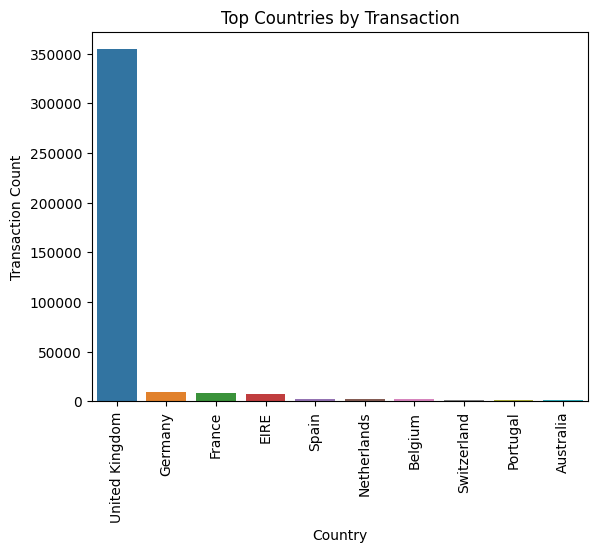

In [51]:
sns.barplot(data = TopCountryTrx.head(10), x = "Country", y = "Transaction Count")
plt.xticks(rotation = 90)
plt.title("Top Countries by Transaction")
plt.show()

In [ ]:
# The most of the transaction UK 

<h4>
    4.2 Top 10 Countries by Revenue
</h4>

In [73]:
TopCountryRevenue = dataSetCleaned.groupby("Country")['Revenue'].sum().sort_values(ascending=False).reset_index().rename(columns={"Revenue":"Total Revenue"})

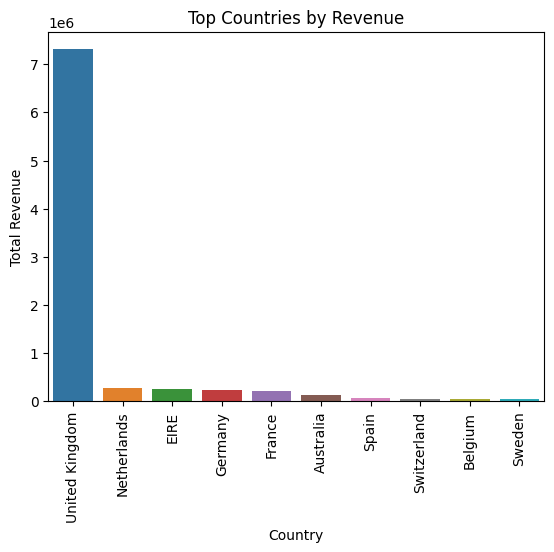

In [74]:
sns.barplot(data = TopCountryRevenue.head(10), x = "Country", y = "Total Revenue")
plt.xticks(rotation = 90)
plt.title("Top Countries by Revenue")
plt.show()

In [56]:
# Here see the Netherlands less count of sales but generate more revenue than germay and france 

<h4>4.3 Month to Month Transaction</h4>

In [64]:
# extract the month
dataSetCleaned["yearMonth"] = dataSetCleaned['InvoiceDate'].dt.to_period("M")

# group the month 
monthlyTransaction = dataSetCleaned.groupby("yearMonth")['Revenue'].sum().reset_index().rename(columns={"Revenue":"Monthly Transaction"})

In [69]:
monthlyTransaction.head()

,yearMonth,Monthly Transaction
0,2010-12,572713.890
1,2011-01,569445.040
2,2011-02,447137.350
3,2011-03,595500.760
4,2011-04,469200.361


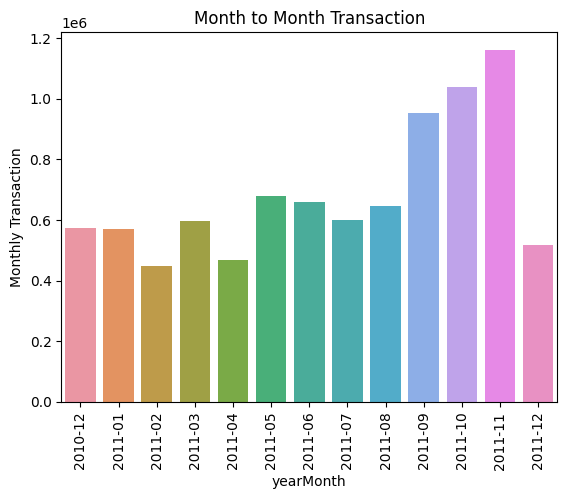

In [70]:
sns.barplot(data = monthlyTransaction, x = "yearMonth", y = "Monthly Transaction")
plt.xticks(rotation = 90)
plt.title("Month to Month Transaction")
plt.show()